# New York City TLC Ride Fare: Credit or Cash

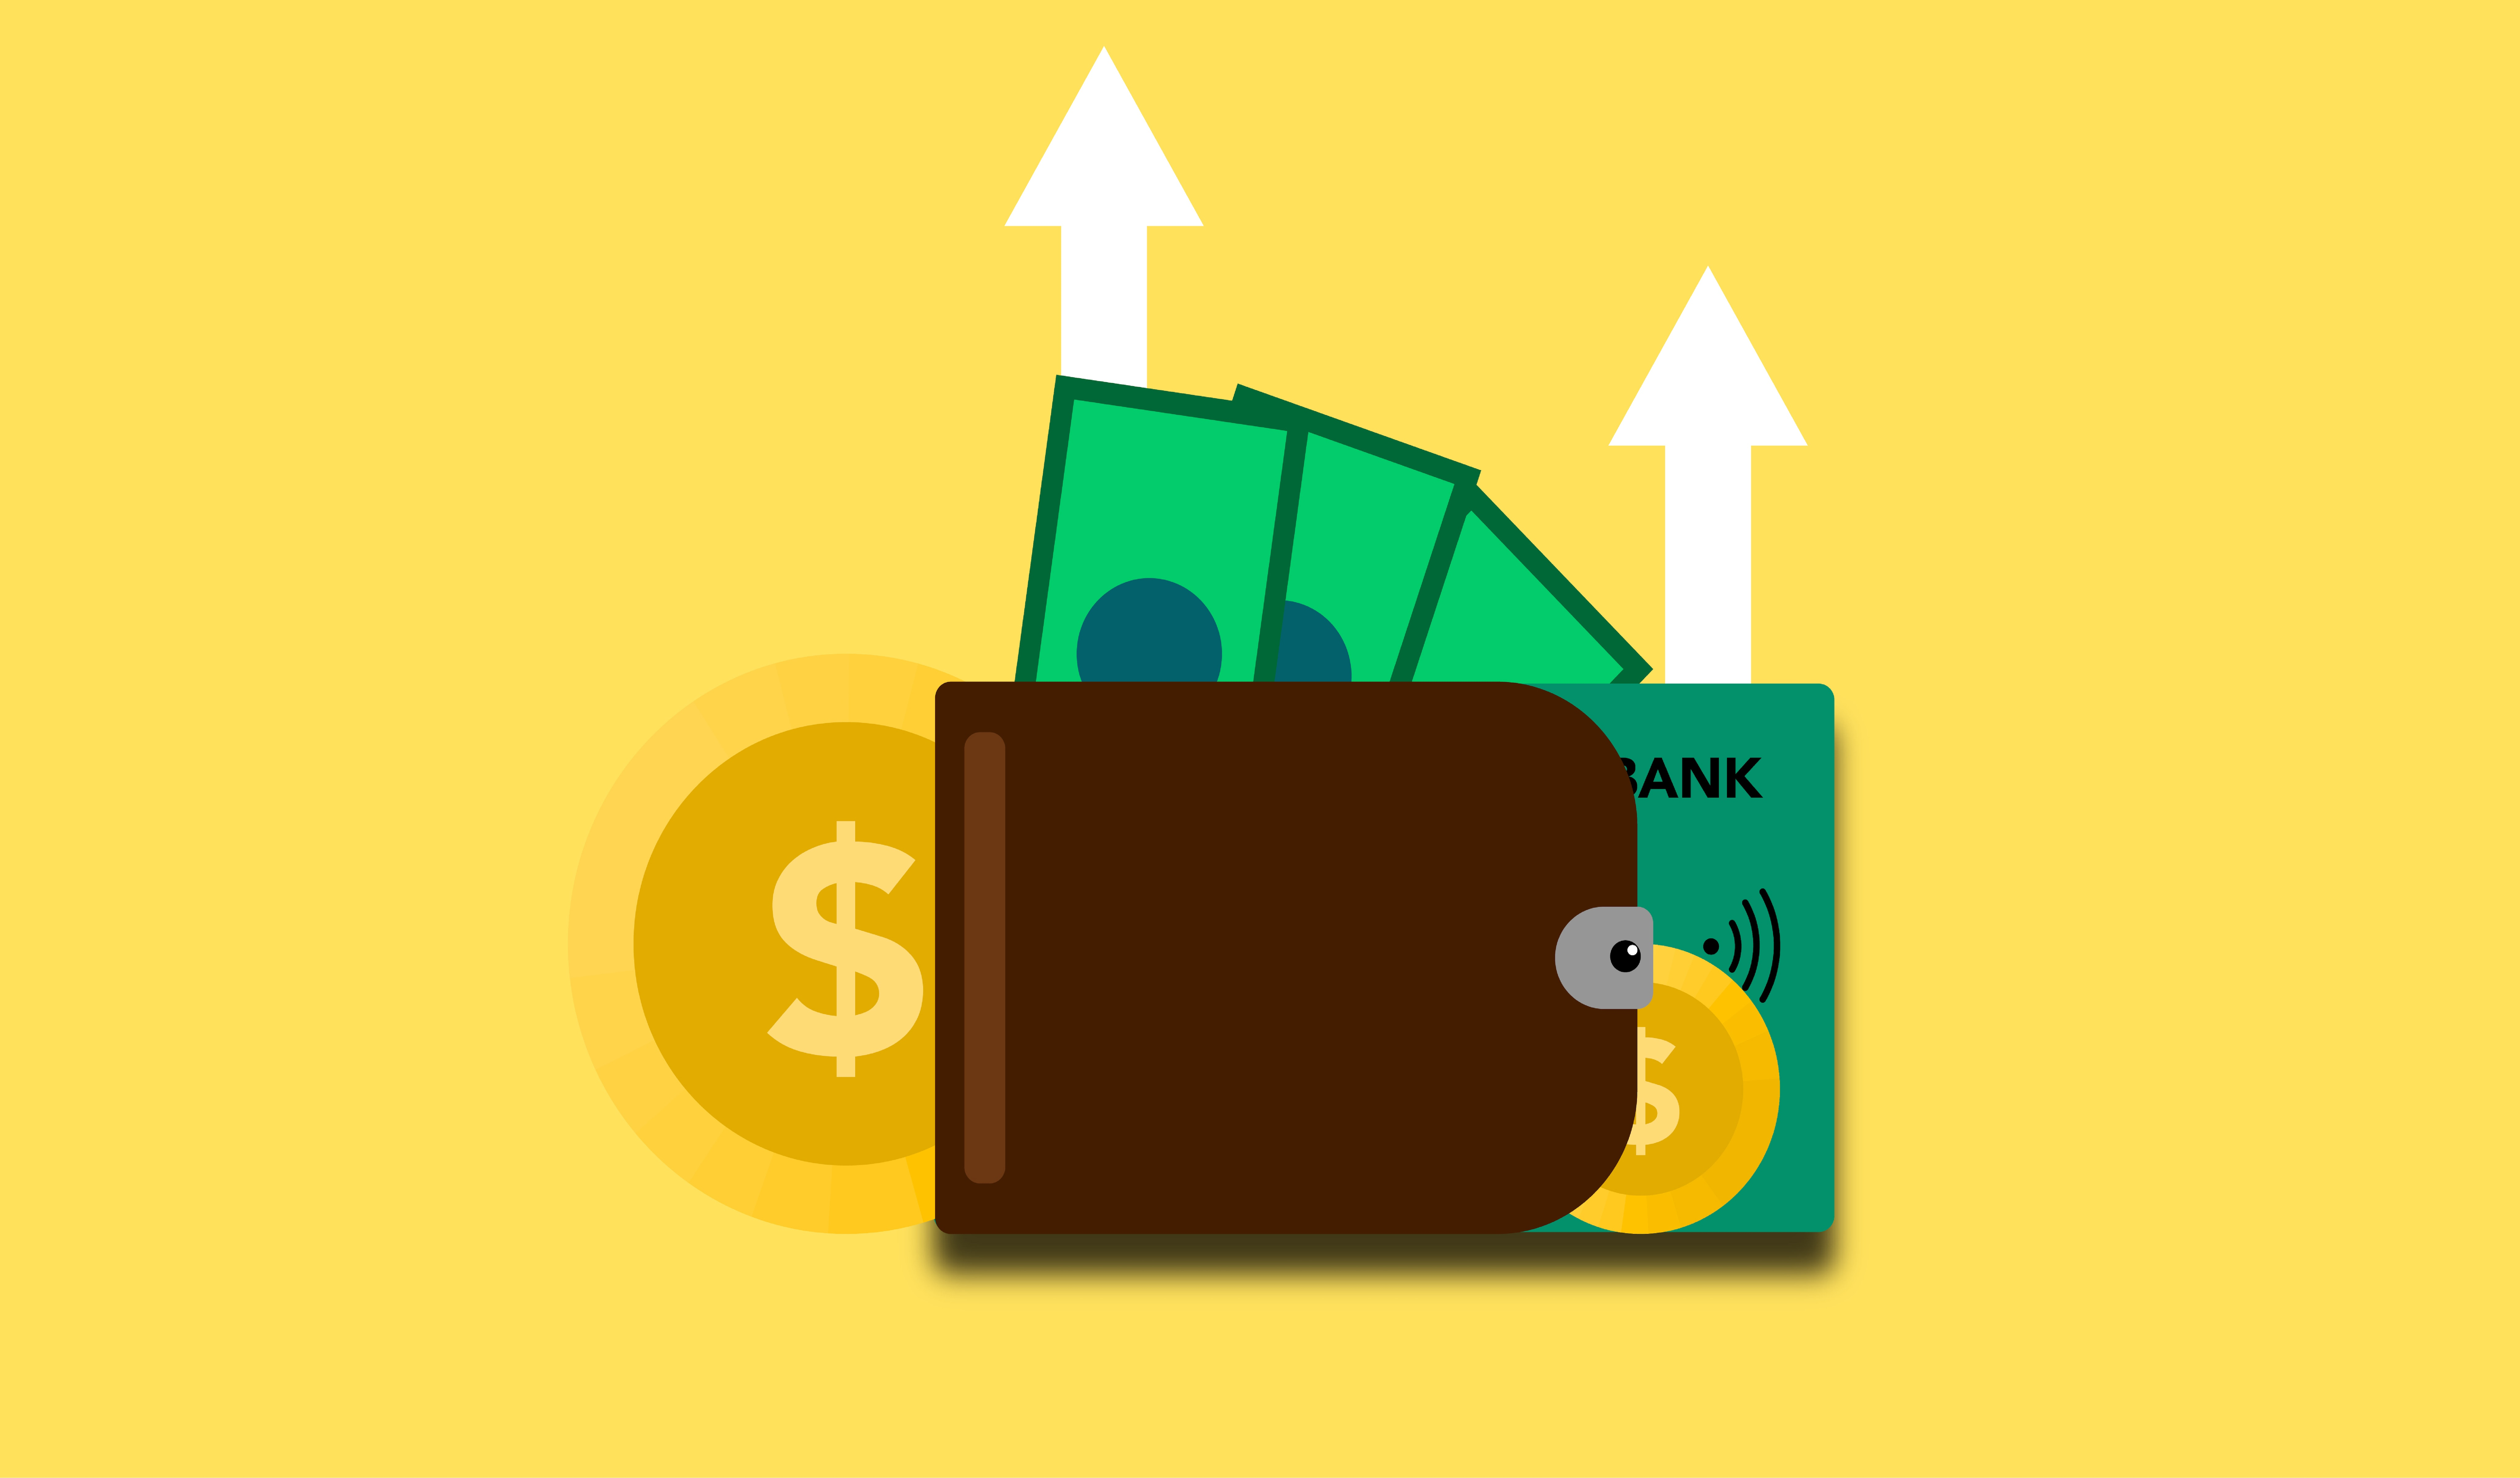
Photo by Monstera: https://www.pexels.com/photo/wallet-with-coins-banknotes-and-credit-card-for-payment-5849577/

In this case study, the New York City Taxi and Limousine Commission (New York City TLC) is reaching out to request that we analyze the relationship between fare amount and payment type. The company wants to optimize revenue. Since this project requires the comparing of two payment types, an A/B test will be conducted to uncover which payment type the company should promote more of to optimize revenue. 

# Conduct an A/B test #

We will use the PACE strategy workflow to approach this project.

## PACE: Plan 

In this stage, we will consider the following questions where applicable to complete your code response:

Is there a relationship between fare amount and payment type, specifically credit card and cash?

### Imports and data loading

Here, we will import packages and libraries needed to compute descriptive statistics and conduct a hypothesis test.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
print('done')

done


In [2]:
# Load dataset into dataframe
taxi_data = pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv", index_col = 0)

## PACE: Analyze and Construct

At this stage, descriptive statitistics will be used because it will help us explore and understand the dataset quickly. It can also reveal the average, minimum, and maximum values for fare amount.

### Data exploration

We will use descriptive statistics to conduct Exploratory Data Analysis (EDA). 

In this dataset, **payment_type** is encoded as the following integers:
*   1 = Credit card
*   2 = Cash
*   3 = No charge
*   4 = Dispute
*   5 = Unknown

In [3]:
# Get a preview of the n=basic statistics
taxi_data.describe(include= 'all')

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


In [4]:
# Get counts of each payment type occurrence
taxi_data['payment_type'].value_counts()

1    15265
2     7267
3      121
4       46
Name: payment_type, dtype: int64

Since we are interested in the relationship between **payment type** and the **total fare amount** the customer pays, we will look at the average **total fare amount** for each payment type. 

In [5]:
# Get the average total fare amaunt

# Show statistics on the fare amount column
print(taxi_data['total_amount'].describe())

# Group the average fare amount by the payment type
pay_type_group = taxi_data.groupby(by= 'payment_type')['total_amount'].mean()

# Make the grouped data into a dataframe
pd.DataFrame(data= pay_type_group, columns= ['total_amount']).reset_index()

count    22699.000000
mean        16.310502
std         16.097295
min       -120.300000
25%          8.750000
50%         11.800000
75%         17.800000
max       1200.290000
Name: total_amount, dtype: float64


,payment_type,total_amount
0,1,17.663577
1,2,13.545821
2,3,13.579669
3,4,11.238261


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger **total fare amount** than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in **total fare amount**.

To assess whether the difference is statistically significant, let us conduct a hypothesis test.


### Hypothesis testing

Before conducting a hypothesis test, let us define the null and alternative hypotheses.

**Null hypothesis**: There is no difference in the average total fare amount between customers who use credit cards and customers who use cash.

**Alternative hypothesis**: There is a difference in the average total fare amount between customers who use credit cards and customers who use cash.

Now that we know our hypotheses, we will choose to conduct a two-sample t-test for our A/B test, specifically on the *credit card* and *cash* payment types. 

We will also choose 5% as the significance level and then proceed with a two-sample t-test.

In [6]:
# Assign the significance level
significance_level = 0.05
significance_level

0.05

In [7]:
# We will extract credit card and cash payment to calculate the p-value

# Extract the credit card payment type into a dataset
credit_card = taxi_data[taxi_data['payment_type'] == 1]

# Extract the cash payment type into a dataset
cash = taxi_data[taxi_data['payment_type'] == 2]

# Calculate the p-value
t_stats, p_value = stats.ttest_ind(a= credit_card['total_amount'], b= cash['total_amount'], equal_var= False)

# print the findings
print('t statistic: ', t_stats)
print('p-value: ', p_value)

t statistic:  20.34644022783838
p-value:  4.5301445359736376e-91


Based on the above results of our t-test, with p-value (4.53e-91) less than 0.05 (as the significance level is 5%), we can reject the null hypothesis. This finding means that there is a statisticaly significant difference in the average total fare amount between the customer paying by credit card or cash.

## PACE: **Execute**

Now, we will consider how to share these results with the stakeholders.

### Communicate insights with stakeholders

An insight it the business task is that encouraging customers to pay by credit card can generate more revenue for taxi cab drivers. However, this project assumes that passengers were forced to pay by credit card or cash, and once informed of this requirement, they always complied with it. 

Since the data was not collected this way (i.e., collected from historical records in their database), an assumption had to be made to randomly group data entries to perform an A/B test. This dataset does not account for other likely explanations. For example, riders might not carry lots of cash, so it's easier to pay for longer/farther trips with a credit card. In other words, it's far more likely that fare amount determines payment type, rather than vice versa. 

The difference between average credit card payment fare and cash fare is inflated, because we use the total amount as the comparing variable. But cash fares all have tip values of $0, while card payments have non-zero values. A possible reason for this occurance is because cash tips aren't declared. In turn, this means that we capture tips in one group but not in the other. So, for fututre analysis, instead of comparing by total amount, we could compare by fare amount column.